In [1]:
import os
import numpy as np
from numpy import linalg as LA
from scipy.sparse import csc_matrix,coo_matrix
from scipy.sparse.linalg import svds, eigs
from sklearn.decomposition import PCA,TruncatedSVD
import pickle
import pandas as pd
from random import randint
import random

import umap
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, KMeans, AffinityPropagation, MeanShift
from sklearn.preprocessing import MinMaxScaler
import kmapper as km
from kmapper.cover import Cover
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

import networkx as nx
from community import best_partition # this is not part of networkx

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.colors import ListedColormap
from scipy import ndimage
import imageio
import plotly
import plotly.graph_objs as go

def bbox(img):
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]

    return rmin, rmax, cmin, cmax    
def embedding(data,dim):
    projection = mapper.fit_transform(data, projection=umap.UMAP(n_components=dim, n_neighbors=200, 
                                             a=None, angular_rp_forest=False, b=None, init='spectral',
                                           learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
                                           metric_kwds=None, min_dist=0.1, n_epochs=500,
                                           negative_sample_rate=10, random_state=47,
                                           repulsion_strength=1.0, set_op_mix_ratio=0.5, spread=0.25,
                                           target_metric='categorical', target_metric_kwds=None,
                                           target_n_neighbors=-1, target_weight=0.5, transform_queue_size=10.0,
                                           transform_seed=42, verbose=False))
    return projection

In [2]:
import numpy as np
import os
import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util
from skimage import io
import imageio

In [3]:
def random_rotation(image_array):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

def rotation(image_array, degree):
    return sk.transform.rotate(image_array, degree)

def random_noise(image_array):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]

def bbox(img):
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]

    return rmin, rmax, cmin, cmax    

def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value
    
def augmentation(folder_path,augmented_folder_path,num_unique_cells,angle_step):
    images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    for num_processed_cell in range(num_unique_cells):
        path = '%s/cell_%s' % (augmented_folder_path,num_processed_cell)
        if not os.path.isdir(path): 
            os.mkdir(path)
        else:
            pass

    for num_processed_cell in range(num_unique_cells):
        print('Augmenting cell '+str(num_processed_cell)+' in '+folder_path)
        image_path = images[num_processed_cell]
        image_path = imageio.imread(image_path)
        rmin, rmax, cmin, cmax = bbox(image_path)
        image_to_transform = np.pad(image_path[rmin:rmax,cmin:cmax], 2, pad_with, padder=0)  

        rotation_angle = 0
        transformed_image = None
        while rotation_angle <= 360:
            transformed_image = rotation(image_to_transform, rotation_angle)
            new_file_path = '%s/cell_%s/angle_%s.jpg' % (augmented_folder_path,num_processed_cell,rotation_angle)
            io.imsave(new_file_path, transformed_image)
            transformed_image = horizontal_flip(transformed_image)
            new_file_path = '%s/cell_%s/angle_%s_flipped.jpg' % (augmented_folder_path,num_processed_cell,rotation_angle)
            io.imsave(new_file_path, transformed_image)
            rotation_angle += angle_step

In [33]:
'''Generate for each of the unique cell type, all rotated and flipped copies. 
The usefulnes of this could be related to the possibility of connecting in the high dimensional space
images that would be otherwise sparsely displaced - curse of dimensionality - and difficult to cluster. 
It is a way of better sensing the low-dimensional manifold structure of the HD representation.'''

num_unique_cells = 200
angle_step = 30

folder_path = '/home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52'
augmented_folder_path = '/home/garner1/Work/dataset/cellImages/image52/augmented'
augmentation(folder_path,augmented_folder_path,num_unique_cells,angle_step)

Augmenting cell 0 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 1 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 2 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 3 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 4 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 5 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 6 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 7 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 8 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 9 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 10 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52


/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-

Augmenting cell 11 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 12 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 13 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 14 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 15 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 16 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 17 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 18 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 19 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 20 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52


/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-

Augmenting cell 21 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 22 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 23 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 24 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 25 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 26 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 27 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 28 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 29 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 30 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 31 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52


/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-

Augmenting cell 32 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 33 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 34 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 35 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 36 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 37 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 38 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 39 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 40 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 41 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 42 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 43 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52


/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-

Augmenting cell 44 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 45 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 46 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 47 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 48 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 49 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 50 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 51 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 52 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52


/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-

Augmenting cell 53 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 54 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 55 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 56 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 57 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 58 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 59 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 60 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 61 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 62 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 63 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 64 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52


/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-

Augmenting cell 65 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 66 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 67 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 68 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 69 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 70 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 71 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 72 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 73 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52


/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-

Augmenting cell 74 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 75 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 76 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 77 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 78 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 79 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 80 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 81 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 82 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52


/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-

Augmenting cell 83 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 84 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 85 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 86 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 87 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 88 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 89 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 90 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 91 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 92 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52


/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-

Augmenting cell 93 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 94 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 95 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 96 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 97 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 98 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 99 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 100 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 101 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 102 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 103 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52


/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-

Augmenting cell 104 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 105 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 106 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 107 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 108 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 109 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 110 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 111 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 112 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 113 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52


/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-

Augmenting cell 114 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 115 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 116 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 117 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 118 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 119 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 120 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 121 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 122 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52


/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-

Augmenting cell 123 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 124 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 125 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 126 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 127 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 128 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 129 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 130 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 131 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 132 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52


/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-

Augmenting cell 133 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 134 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 135 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 136 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 137 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 138 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 139 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 140 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 141 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52


/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-

Augmenting cell 142 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 143 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 144 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 145 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 146 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 147 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 148 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 149 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 150 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 151 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 152 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52


/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-

Augmenting cell 153 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 154 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 155 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 156 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 157 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 158 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 159 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 160 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 161 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 162 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 163 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52


/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-

Augmenting cell 164 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 165 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 166 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 167 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 168 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 169 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 170 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 171 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 172 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 173 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52


/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-

Augmenting cell 174 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 175 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 176 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 177 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 178 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 179 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 180 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 181 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 182 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 183 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52


/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-

Augmenting cell 184 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 185 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 186 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 187 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 188 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 189 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 190 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 191 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 192 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 193 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52


/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-

Augmenting cell 194 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 195 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 196 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 197 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 198 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52
Augmenting cell 199 in /home/garner1/Work/dataset/cellImages/image52/Nuclei_Image52


/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:141: UserWarning:

Possible precision loss when converting from float64 to uint8

/usr/local/share/anaconda2/lib/python2.7/site-

In [34]:
'''Loading the data'''
widths = []
heights = []
target = []
directories = ['/home/garner1/Work/dataset/cellImages/training/augmented/Cancer',
               '/home/garner1/Work/dataset/cellImages/training/augmented/Immuno',
              '/home/garner1/Work/dataset/cellImages/training/augmented/Other',
               '/home/garner1/Work/dataset/cellImages/image52/augmented']
target_id = 0
cell_numb = num_unique_cells
for directory in directories:
    target_id += 1
    for cell in os.listdir(directory)[:cell_numb]:
        path = os.path.join(directory, cell)
        for img in os.listdir(path):
            filename = os.path.join(path, img)
            img = imageio.imread(filename)
            rmin, rmax, cmin, cmax = bbox(img)
            width = rmax-rmin
            height = cmax-cmin
            widths.append(width)
            heights.append(height)
            target.append(target_id)    

'''Resizing images to small boxes'''
Mwidths = max(widths)
Mheights = max(heights)
images = []
for directory in directories:
    for cell in os.listdir(directory)[:cell_numb]:
        path = os.path.join(directory, cell)
        for img in os.listdir(path):
            filename = os.path.join(path, img)
            img = imageio.imread(filename)
            rmin, rmax, cmin, cmax = bbox(img)
            padwidth = int(Mwidths-(rmax-rmin))
            padheight = int(Mheights-(cmax-cmin))
            newimg = np.pad(img[rmin:rmax,cmin:cmax],((0,padwidth),(0,padheight)),'constant', constant_values=(0))
            images.append(newimg)

data = np.zeros((Mwidths*Mheights,len(images)))
for ind in range(len(images)): data[:,ind] = images[ind].flatten() # from 2D arrays to 1D arrays
data = data.transpose()

print(data.shape)

(94576, 2585)


In [ ]:
'''2D embedding'''
d2_embedding = umap.UMAP(n_neighbors=30,min_dist=0.0,n_components=2,random_state=42).fit_transform(data)

In [ ]:
'''2D Visualization'''
fig, ax = plt.subplots()
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
labels = ['cancer','immuno','other','new']

cancer = (np.asarray(target) == 1)
ax.scatter(d2_embedding[cancer, 0], d2_embedding[cancer, 1], c=colors[0], s=10, label=labels[0]);

immuno = (np.asarray(target) == 2)
ax.scatter(d2_embedding[immuno, 0], d2_embedding[immuno, 1], c=colors[1], s=10, label=labels[1]);

other = (np.asarray(target) == 3)
ax.scatter(d2_embedding[other, 0], d2_embedding[other, 1], c=colors[2], s=10, label=labels[2]);

new = (np.asarray(target) == 4)
ax.scatter(d2_embedding[new, 0], d2_embedding[new, 1], c=colors[3], s=10, label=labels[3]);

ax.legend()
plt.show()

In [ ]:
'''3D visualization of annotated data'''
d3_embedding = umap.UMAP(n_neighbors=50,min_dist=0.0,n_components=3,random_state=42).fit_transform(data)

In [ ]:
# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()
# Configure the trace.
cancer = (np.asarray(target) == 1)
fig = go.Figure(data=[go.Scatter3d(
    x=d3_embedding[cancer,0],  # <-- Put your data instead
    y=d3_embedding[cancer,1],  # <-- Put your data instead
    z=d3_embedding[cancer,2],  # <-- Put your data instead
    mode='markers',
    marker=dict(size=3,color='red',opacity=0.25),
    name='cancer')])
immuno = (np.asarray(target) == 2)
fig.add_trace(go.Scatter3d(
    x=d3_embedding[immuno,0],  # <-- Put your data instead
    y=d3_embedding[immuno,1],  # <-- Put your data instead
    z=d3_embedding[immuno,2],  # <-- Put your data instead
    mode='markers',
    marker=dict(size=3,color='blue',opacity=0.25),
    name='immuno'))
other = (np.asarray(target) == 3)
fig.add_trace(go.Scatter3d(
    x=d3_embedding[other,0],  # <-- Put your data instead
    y=d3_embedding[other,1],  # <-- Put your data instead
    z=d3_embedding[other,2],  # <-- Put your data instead
    mode='markers',
    marker=dict(size=3,color='green',opacity=0.25),
    name='other'))
new = (np.asarray(target) == 4)
fig.add_trace(go.Scatter3d(
    x=d3_embedding[new,0],  # <-- Put your data instead
    y=d3_embedding[new,1],  # <-- Put your data instead
    z=d3_embedding[new,2],  # <-- Put your data instead
    mode='markers',
    marker=dict(size=3,color='orange',opacity=0.25),
    name='new'))
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

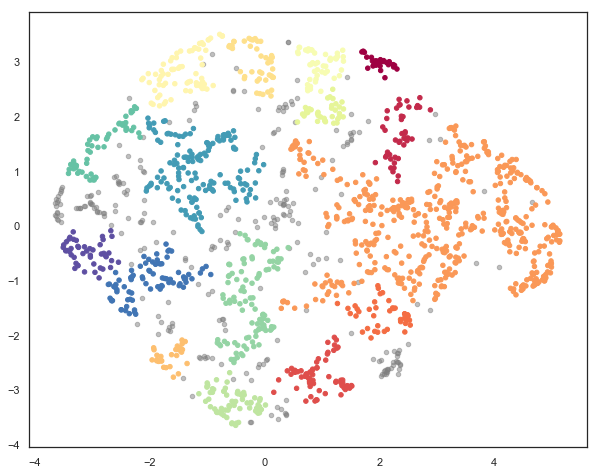

In [4]:
'''
HDBSCAN clusters in 2D
low min sample size seems to refuce unclustered data;
larger min cluster size decrease cluster numbers
'''
d2_labels = hdbscan.HDBSCAN(min_samples=3,min_cluster_size=30).fit_predict(d2_embedding)

sns.set(style='white', rc={'figure.figsize':(10,8)})
clustered = (d2_labels >= 0)
plt.scatter(d2_embedding[~clustered, 0],
            d2_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=20,
            alpha=0.5)
plt.scatter(d2_embedding[clustered, 0],
            d2_embedding[clustered, 1],
            c=d2_labels[clustered],
            s=20,
            cmap='Spectral');

In [6]:
'''
HDBSCAN clusters in 3D
low min sample size seems to refuce unclustered data;
larger min cluster size decrease cluster numbers
PCA reduction might not be a good idea because shape space is non-linear and the linear reduction could distort distances and later clustering
'''
d3_labels = hdbscan.HDBSCAN(min_samples=30,min_cluster_size=100).fit_predict(d3_embedding)

import plotly.graph_objects as go
fig = go.Figure()
size = 2
for cluster in set(d3_labels):
    clustered = (d3_labels == cluster)
    fig.add_trace(go.Scatter3d(
        x=d3_embedding[clustered,0],  # <-- Put your data instead
        y=d3_embedding[clustered,1],  # <-- Put your data instead
        z=d3_embedding[clustered,2],  # <-- Put your data instead
        name="cluster "+str(cluster),
        mode="markers",
        marker=dict(color=cluster+1,size=size+cluster, opacity=1)
    ))
fig.update_layout(title_text="HDBSCAN clusters in 3D",
                  title_font_size=30)
fig.show()
##########
clustered = (d3_labels >= 0)
print('The percentage of clustered data points is '+str(np.sum(clustered) *1.0/ data.shape[0]*100)+'%')


The percentage of clustered data points is 66.0977045320777%


In [7]:
directory = '/home/garner1/Work/dataset/cellImages/Dataset_Image52/images'
ind = 0
image_cluster = []
for img in os.listdir(directory):
    filename = os.path.join(directory, img)
    image_cluster.append((int(img.strip('.jpg')),d3_labels[ind]))
    ind += 1
    
import operator
image_cluster.sort(key = operator.itemgetter(0))
ordered_d3_labels = np.array([cluster[1] for cluster in image_cluster])

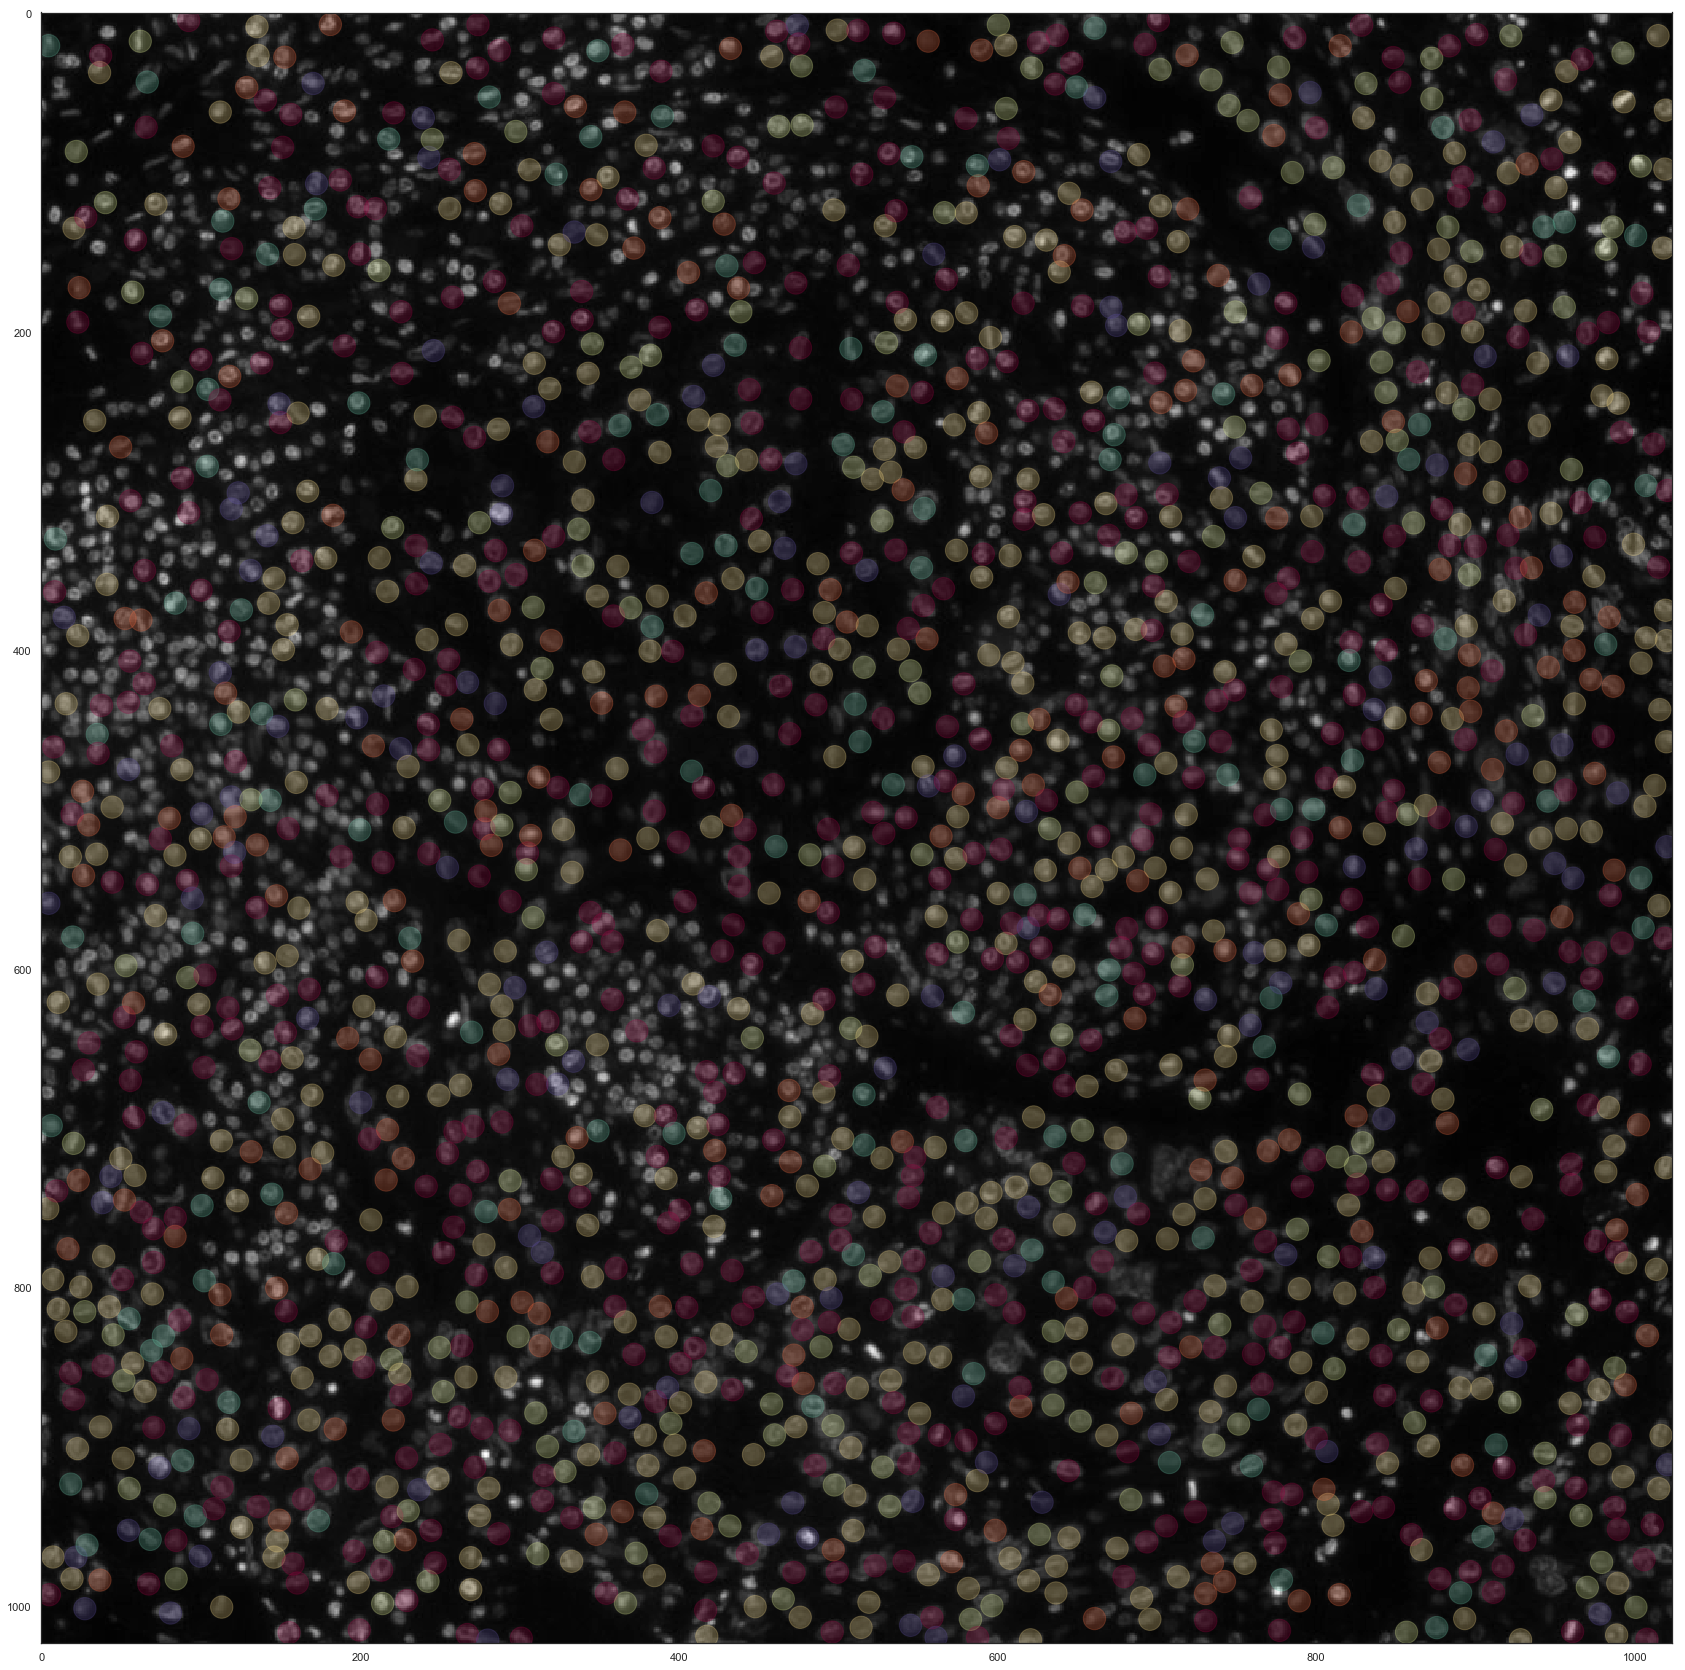

In [10]:
import csv
with open('/home/garner1/Work/dataset/cellImages/Dataset_Image52/properties.csv', 'r') as f:
    properties = list(csv.reader(f, delimiter=','))
properties = np.array(properties)

image = imageio.imread('~/Work/dataset/cellImages/Dataset_Image52/iMS266_20190426_001.sub52.jpg')
sns.set(style='white', rc={'figure.figsize':(50,30)})
plt.scatter(properties[1:,1].astype(np.float),
            properties[1:,2].astype(np.float),
            c=ordered_d3_labels+1,
            s=500,
            cmap='Spectral',
            alpha=0.25);
plt.imshow(image,cmap='gray')
plt.show()
# plt.axis('off')

In [53]:
'''Get the node2vec representation of the centroid from each segmented cell. 
Use it together with the intensity array as input for the UMAP dimensionality reduction.
Spatial contect + local intensity information'''

(1024, 1024)

In [33]:
np.savetxt("clusters.csv", d3_labels.astype(int), delimiter=",", fmt='%i')